In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import matplotlib.patches as patches # importation d'un affichage de rectangle (utile pour le tableau)
import numpy as np
from scipy import stats
import skyfield

In [3]:
# éphémérides astronomiques :
from skyfield.api import load
from skyfield.elementslib import osculating_elements_of

In [5]:
ts = load.timescale()
t = ts.now() # date de la compilation

In [7]:
planets = load('de421.bsp')# charge un fichier d'éphémérides (valable 1900-2050)
soleil=planets['Sun']
listeplanetes=['mercury','venus','earth','mars']+['jupiter','saturn','uranus','neptune']
listePlanetesFR=['Mercure','Vénus','Terre', 'Mars']+['Jupiter', 'Saturne', 'Uranus', 'Neptune']

In [9]:
# Création des listes de valeurs de a et de T :
liste_T=[] #liste des périodes orbitales
liste_a=[] #liste des demi grands-axes

for nom in listeplanetes:
    planete=planets[nom+' barycenter']
    position=soleil.at(t).observe(planete) # on définit la position de la planète depuis le centre du Soleil
    elements = osculating_elements_of(position) # on calcule a et T de la planète
    a = elements.semi_major_axis.au
    liste_a.append(a)
    T = elements.period_in_days/365.25 # conversion de T en années terrestres
    liste_T.append(T)

In [11]:
# Affichage des données des listes des planètes, a et T
print(listePlanetesFR)
print(liste_a)
print(liste_T)

['Mercure', 'Vénus', 'Terre', 'Mars', 'Jupiter', 'Saturne', 'Uranus', 'Neptune']
[0.3870973139063208, 0.7233322640241115, 0.9999938186579876, 1.5236236904564013, 5.202425669150729, 9.549901792269145, 19.290694434476865, 30.139228045610963]
[0.2408454259767477, 0.615197307980573, 1.0000080941868874, 1.8807224441035926, 11.860685671709115, 29.508320380180084, 84.72674341693927, 165.46083181325992]


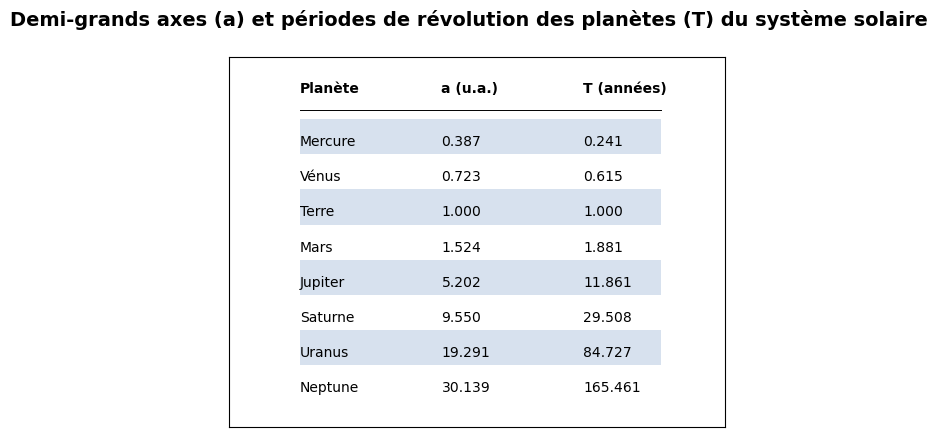

In [13]:
# Affichage d'un tableau qui regroupe les paramètres a et T des planètes du système solaire :
fig,ax=plt.subplots()

fig.suptitle('Demi-grands axes (a) et périodes de révolution des planètes (T) du système solaire',
             fontsize=14, fontweight='bold')
ax.set_ylim(-2.5,len(listePlanetesFR))
ax.invert_yaxis()
ax.set_xlim(-1,2.5)
ax.set_xticks([]) # on efface les graduations de l'axe x
ax.set_yticks([]) # on efface les graduations de l'axe y
ax.text(-0.5,-1.5,"Planète",fontweight='bold')
ax.text(0.5,-1.5,"a (u.a.)", fontweight='bold')
ax.text(1.5,-1.5,"T (années)",fontweight='bold')
ax.plot([-0.5,2.05],[-1,-1],lw=0.7,c='k')

for N in range(len(listePlanetesFR)):
    ax.text(-0.5,N,listePlanetesFR[N])
    ax.text(0.5,N,'%.3f'%(liste_a[N]))
    ax.text(1.5,N,'%.3f'%(liste_T[N]))
    # Affichage d'une bande bleue en fond (planètes de rang pair)
    if N%2==0:
        ax.add_patch(patches.Rectangle(
       (-0.5, N+0.25),2.55,-1,
       facecolor = 'lightsteelblue', alpha=0.5,zorder=-1,
     ) )

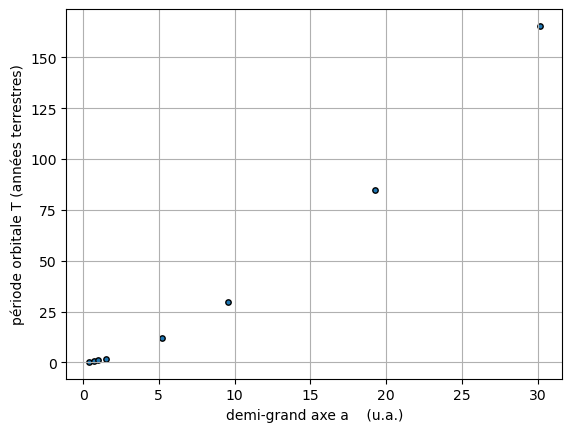

In [15]:
# Représentation de la période en fonction du demi-grand axe de chaque planète :
fig = plt.figure()
ax1 = fig.add_subplot()

prop_scatter=dict(marker='o',s=15, edgecolor='k') # choix graphique de la taille des points 
                                                 #(marqueurs ronds, bleu de taille 15 avec cerclage noir)
ax1.scatter(liste_a,liste_T,**prop_scatter)
ax1.set_xlabel("demi-grand axe a    (u.a.)")
ax1.set_ylabel("période orbitale T (années terrestres)")
plt.grid()
fig.savefig("Kepler3_T_a.png",dpi=300)

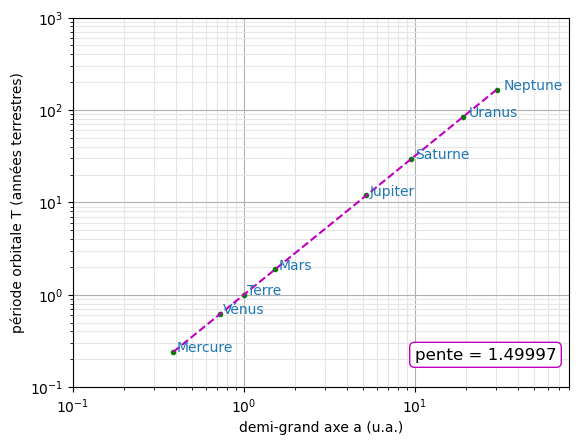

In [17]:
# Représentation des données à l'aide d'une échelle logarithmique pour retrouver la loi en puissance :
fig = plt.figure()
ax2 = fig.add_subplot()
prop_scatter=dict(marker='o',s=15, edgecolor='k') # choix graphique des points

ax2.set_xlabel(r"demi-grand axe a (u.a.)")
ax2.set_ylabel(r"période orbitale T (années terrestres)")


ax2.loglog(liste_a,liste_T, color='green', marker='.', linestyle='none') # tracé des points correspondants aux planètes

# Pour chaque point on ajoute l'étiquette de la planète
for i, txt in enumerate(listePlanetesFR):
       ax2.annotate(txt, (liste_a[i]+10**(liste_a[i]/50)-1, liste_T[i]), color='#1f77b4')

# Ajustement d'un modèle linaire sur des données transformées en affichage log
fit = np.polyfit(np.log(liste_a), np.log(liste_T), 1) # Ajustement d'ordre 1 (linéaire)
c = 10**fit[1]*liste_a**fit[0]
pente = round(fit[0],5)

ax2.plot(liste_a, c, 'm--') # tracé la droite de régression en couleur magenta


ax2.set_xlim([0.1, 80])
ax2.set_ylim([0.1,10**3])
ax2.grid()
ax2.grid(which="minor", color="0.9")
plt.text(10,0.2, "pente = " + str(pente), size=12,
bbox=dict(boxstyle="round", ec=("m"), fc=("w"))) # affichage de la pente de la régression linéaire

fig.savefig("Kepler3_T_a_log.png",dpi=300)

In [19]:
print(fit[0])

1.4999741723132365


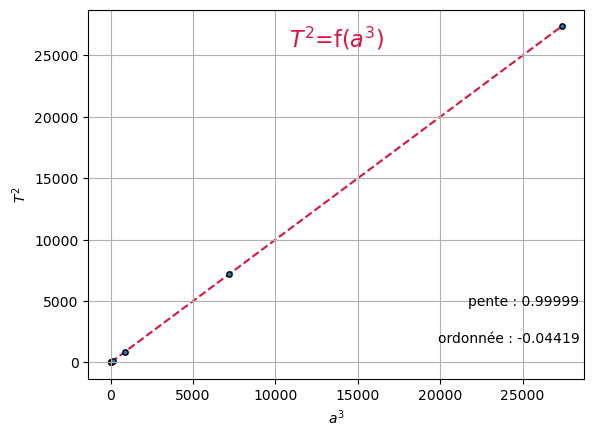

In [21]:
# Représentation de T^2 en fonction de a^3 :

fig = plt.figure()
ax3 = fig.add_subplot()
prop_scatter=dict(marker='o',s=15, edgecolor='k') # choix graphique des points
c_regression='crimson' # choix de la couleur cramoisi pour l'affichage de la régression linéaire

# Pour calculer les puissances, il faut convertir les listes en séries Numpy :
liste_T=np.array(liste_T)
liste_a=np.array(liste_a)
#ax3.set_xticks([])
#ax3.set_yticks([])
ax3.set_xlabel(r"$a^3$")
ax3.set_ylabel(r"$T^2$")
ax3.scatter(liste_a**3,liste_T**2,**prop_scatter) # tracé des points

# Régression linéaire :
x=liste_a**3
y=liste_T**2
fit=np.polyfit(x, y, 1)
fit_fn=np.poly1d(fit)
pente=fit[0]
ordo=fit[1]

ax3.plot(x, fit_fn(x), '--',c=c_regression, zorder=0) # tracé la droite de régression

ax3.text(0.99, 0.2, 'pente : {:.5f}'.format(pente), ha='right', transform=ax3.transAxes)
ax3.text(0.99, 0.1, 'ordonnée : {:.5f}'.format(ordo), ha='right', transform=ax3.transAxes)
ax3.text(0.5,0.90,"$T^2$=f($a^3$)",c=c_regression, transform=ax3.transAxes,
         ha='center',fontsize=16)
plt.grid()

fig.savefig("Kepler3.pdf",dpi=300)
fig.savefig("Kepler3.png",dpi=300)